In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [28]:
from tf.app import use
import csv

A = use("etcbc/bhsa", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots/node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


In [2]:
# 각 CSV 파일을 DataFrame으로 읽기
df1 = pd.read_csv('esther_description.csv')
df2 = pd.read_csv('esther_discourse.csv')
df3 = pd.read_csv('esther_letter.csv')

# 세 DataFrame을 합치기
df = pd.concat([df1, df2, df3])

# 특정 열('column_name')을 기준으로 정렬하기
df_sorted = df.sort_values('sentence_node')

# 결과 출력
print(df_sorted)

           verse  sentence_node speakers         type
0     Esther 1:1        1229022   author  description
1     Esther 1:1        1229023   author  description
2     Esther 1:2        1229024   author  description
3     Esther 1:5        1229025   author  description
4     Esther 1:6        1229026   author  description
..           ...            ...      ...          ...
291  Esther 10:3        1229451   author  description
292  Esther 10:3        1229452   author  description
293  Esther 10:3        1229453   author  description
294  Esther 10:3        1229454   author  description
295  Esther 10:3        1229455   author  description

[434 rows x 4 columns]


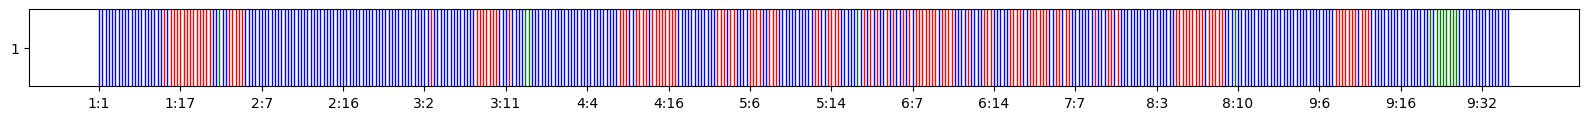

In [58]:
# type 별로 색상 지정
colors = {'description': 'blue', 'discourse': 'red', 'letter': 'green'}

plt.figure(figsize=(20,1))

# 각 숫자에 대해 선 그리기
for index, typ in enumerate(df_sorted['type']):
    df_type = df_sorted[df_sorted['type'] == typ]
    plt.plot(np.arange(len(df_sorted))[index], 1, color=colors[typ], marker='|', linestyle='None', markersize=60)

# 그래프 제목과 레이블 추가
# plt.title('Sequential Plot')
# plt.xlabel('Index')
# plt.ylabel('Number')

# 범례 추가
# plt.legend([plt.Line2D((0,1),(0,0), color=colors[typ], marker='|', linestyle='None') for typ in np.unique(df_sorted['type'])], np.unique(df_sorted['type']), bbox_to_anchor=(0.5,1.15))

# 가로축 값을 성경 구절 번호로 변경하기
xval = [0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425]
new_xval = []
for n in xval:
    node = n+1229022
    section = T.sectionFromNode(node)
    scripture = str(section[1]) + ':' + str(section[2])
    new_xval.append(scripture)

plt.xticks(xval, new_xval)
plt.yticks([1])


# 그래프 보여주기
plt.show()